## Data quality check / cleaning / preparation 

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.** An example is given below.

### Data quality check
*By Catherine Heming*

The code below visualizes the distribution of all the variables in the dataset, and their association with the response.

In [3]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

health = pd.read_csv('Mental health Depression disorder Data.csv')
health.head()

/var/folders/qs/k20tf5tx1g95_rd5zfrm_4nw0000gn/T/ipykernel_13431/2771141350.py:8: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  health = pd.read_csv('Mental health Depression disorder Data.csv')


,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260


In [20]:
print("number of uniqiue countries:" , len(health['Entity'].unique()))


number of uniqiue countries: 276


In [21]:
print(health['Year'].unique())

['1990' '1991' '1992' '1993' '1994' '1995' '1996' '1997' '1998' '1999'
 '2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009'
 '2010' '2011' '2012' '2013' '2014' '2015' '2016' '2017' 'Year' '1800'
 '1801' '1802' '1803' '1804' '1805' '1806' '1807' '1808' '1809' '1810'
 '1811' '1812' '1813' '1814' '1815' '1816' '1817' '1818' '1819' '1820'
 '1821' '1822' '1823' '1824' '1825' '1826' '1827' '1828' '1829' '1830'
 '1831' '1832' '1833' '1834' '1835' '1836' '1837' '1838' '1839' '1840'
 '1841' '1842' '1843' '1844' '1845' '1846' '1847' '1848' '1849' '1850'
 '1851' '1852' '1853' '1854' '1855' '1856' '1857' '1858' '1859' '1860'
 '1861' '1862' '1863' '1864' '1865' '1866' '1867' '1868' '1869' '1870'
 '1871' '1872' '1873' '1874' '1875' '1876' '1877' '1878' '1879' '1880'
 '1881' '1882' '1883' '1884' '1885' '1886' '1887' '1888' '1889' '1890'
 '1891' '1892' '1893' '1894' '1895' '1896' '1897' '1898' '1899' '1900'
 '1901' '1902' '1903' '1904' '1905' '1906' '1907' '1908' '1909' '1910'
 '1911

In [27]:
health.isna().any()

index                        False
Entity                       False
Code                          True
Year                         False
Schizophrenia (%)             True
Bipolar disorder (%)          True
Eating disorders (%)          True
Anxiety disorders (%)         True
Drug use disorders (%)        True
Depression (%)                True
Alcohol use disorders (%)     True
dtype: bool

In [8]:
#...Distribution of categorical variables...#

In [9]:
#...Association of the response with the predictors...#

### Data cleaning
*By Catherine heming and Becca Muro*

From the data quality check we realized that:

1. There are 276 unique countries, but many of these are undeveloped nations that may have poor medical care data. So we decided to work on a subset of countries.

2. There is data from years that will not be helpful in any model we run. For example, we do not need to study mental health rates from 300 BCE.

3. All of the mental health disorders in our dataframe have several Nan value. Most of these appeared in the years before the 1990s and in countries that are less developed. So we decided it would be fine to remove any remaining Nan values because there were not a significant amount affecting our data of interest. 

The code below implements the above cleaning.

In [4]:
# Catherine

# Select data from certain countries that we know have developed health care systems.  
developed = health.loc[health['Entity'].isin(['United States','Japan','Argentina','Australia','United Kingdom', 'South Korea','Denmark','Canada','France','Taiwan','Uruguay','Germany','Norway','Austria','Belgium','Netherlands', 'Finland','Thailand','United Arab Emirates', 'Sweden', 'Switzerland', 'Chile', 'Costa Rica', 'Mexico', 'Ireland', 'Italy', 'Spain', 'Portugal', 'Brazil', 'Israel','Luxembourg','Singapore'])]

# reset index 
developed = developed.reset_index(drop=True)
developed = developed.drop('index', axis=1)



In [11]:
# Becca 
# edit the column names to assist in running any future models
map_names = {'Entity': 'country',
             'Year' : 'year',
             'Schizophrenia (%)':'schizo', 
             'Bipolar disorder (%)':'bipolar',
             'Eating disorders (%)' : 'eating_dis',
             'Anxiety disorders (%)' : 'anxiety',
             'Drug use disorders (%)':'drug',
             'Depression (%)':'depres',
             'Alcohol use disorders (%)':'alcohol'}

developed.rename(columns=map_names,inplace=True)

# Catherine
# just for years 1990 - 2017
developed = developed.loc[developed['year'].isin(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017'])] 


# dropping NA
developed1 = developed.dropna()

len(developed1) # we had 896 data points to work with 




896

In [15]:
# Catherine Heming 

# using numpy to split into 2 by 80% for training set and the remaining for the rest
developed2 = developed1.sample(frac = 1)
train,test = np.split(developed2,[int(0.80 * len(developed2))])



### Data preparation
*By Sankaranarayanan Balasubramanian and Chun-Li*

The following data preparation steps helped us to prepare our data for implementing various modeling / validation techniques:

1. Since we need to predict house price, we derived some new predictors *(from existing predictors)* that intuitively seem to be helpuful to predict house price. 

2. We have shuffled the dataset to prepare it for K-fold cross validation.

3. We have created a standardized version of the dataset, as we will use it to develop Lasso / Ridge regression models.

In [3]:
######---------------Creating new predictors----------------#########

#Creating number of bedrooms per unit floor area

#Creating ratio of bathrooms to bedrooms

#Creating ratio of carpet area to floor area

In [ ]:
######-----------Shuffling the dataset for K-fold------------#########

In [ ]:
######-----Standardizing the dataset for Lasso / Ridge-------#########

## Exploratory data analysis

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

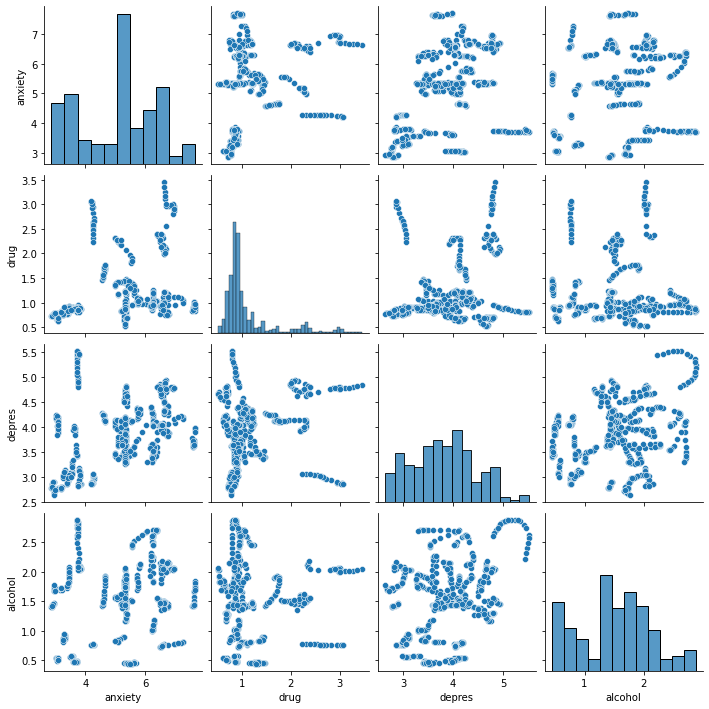

In [28]:
# Marlene

sns.pairplot(train)
plt.show()

In [17]:
# Catherine
# finding our variables of interest correlations to depression
# anxiety had the highest correlation

train.corrwith(train.depres)

anxiety    0.453863
drug       0.186161
depres     1.000000
alcohol    0.278212
dtype: float64

In [36]:
# Catherine
# Below is the code to determine what degree of interaction is best. 
# Interactions of degree 2 produced the lowest RMSE

predictor_set = ['anxiety','drug','depres','alcohol']
from itertools import product
values = np.arange(0,4)
polynomial_transformations = pd.DataFrame(product(values, repeat=4), columns=predictor_set).loc[1:,]
polynomial_transformations.loc[:,'sum_degree'] = (polynomial_transformations).astype(int).sum(axis=1)
polynomial_transformations.loc[:,'count_zeros'] = (polynomial_transformations == 0).astype(int).sum(axis=1)
polynomial_transformations.sort_values(by = ['count_zeros', 'sum_degree'], ascending=[False, True], inplace=True)
polynomial_transformations.drop(columns = ['count_zeros'], inplace=True)
polynomial_transformations.reset_index(inplace = True, drop = True)


In [37]:
#Setting the seed as we are shuffling the data before splitting it into K-folds
np.random.seed(123)
# Shuffling the training set before creating K folds
train = train.sample(frac=1)
k = 5 #5-fold cross validation
fold_size = np.round(train.shape[0]/k)

In [38]:
from sklearn.model_selection import KFold

def KFoldCV(selected_interactions, interaction_being_tested):
    kf = KFold(n_splits=5)
    kf.get_n_splits(train)
    total_rmse = 0
    for i, (train_index,test_index) in enumerate(kf.split(train)):
        model = smf.ols('depres~anxiety+drug+depres+alcohol'+selected_interactions+\
                       interaction_being_tested, data = train.iloc[train_index]).fit()
        pred_price = model.predict(train.iloc[test_index])
        rmse = np.sqrt(((train.depres - pred_price)**2).mean())
        total_rmse += rmse
    return total_rmse/k

In [39]:
# This code implements the algorithm of systematically considering interactions of degree 2 and going upto 
# the interaction of degree 12. For a given degree 'd' the interactions are selected greedily based on 
# highest reduction in the 5-fold cross validation RMSE. Once no more reduction in the 5-fold cross validation
# RMSE is possible using interactions of degree 'd', interaction terms of the next higher degree 'd+1' are considered.

# 5-fold cross validation RMSE of the initial model with the 4 predictors of degree one
cv_previous_model = KFoldCV(selected_interactions = '', interaction_being_tested = '')
interaction_being_tested = '+'
selected_interactions = ''

# Considering interactions of degree 'd' = 2 to 12
for d in np.arange(2,13):
    
    # Selecting interaction terms of degree = 'd'
    degree_set = polynomial_transformations.loc[polynomial_transformations.sum_degree==d, :]
    
    # Initializing objects to store the interactions of degree 'd' that reduce the
    # 5-fold cross validation RMSEs as compared to the previous model
    interactions_that_reduce_KfoldCV = []; cv_degree = []; 
    
    # Creating another DataFrame that will consist of the updated set of interactions of degree 'd' to be considered
    # as interactions that do not reduce the 5-fold cross validation RMSE will be discarded
    degree_set_updated = pd.DataFrame(columns = degree_set.columns)
    
    # Continue adding interactions of degree 'd' in the model until no interactions reduce 
    # the 5-fold cross-validation RMSE
    while True:
        
        #Iterating over all possible interactions of degree 'd'
        for index, row in degree_set.iterrows():
            
            # Creating the formula expression for the interaction term to be tested
            for predictor in predictor_set:
                interaction_being_tested = interaction_being_tested + ('I('+predictor +'**' +\
                                         str(row[predictor]) + ')*' if row[predictor]>1 else\
                                               predictor + '*' if row[predictor]==1 else '')
            interaction_being_tested = interaction_being_tested[:-1]
            
            # Call the function 'KFoldCV' to find out the 5-fold cross validation error on adding the 
            # interaction term being tested to the model
            cv = KFoldCV(selected_interactions, interaction_being_tested)
            
            # If the interaction term being tested reduces the 5-fold cross validation RMSE as compared to the
            # previous model, then consider adding it to the model
            if cv<cv_previous_model:
                interactions_that_reduce_KfoldCV.append(interaction_being_tested)
                cv_degree.append(cv)
                degree_set_updated = pd.concat([degree_set_updated, row.to_frame().T])
            interaction_being_tested = '+'
        cv_data = pd.DataFrame({'interaction':interactions_that_reduce_KfoldCV, 'cv':cv_degree})
        
        # Sort the interaction terms that reduce the 5-fold cross valdiation RMSE based on their respective
        # 5-fold cross validation RMSE
        cv_data.sort_values(by = 'cv', inplace = True)
        
        # Break the loop if no interaction of degree 'd' reduces the 5-fold cross validation RMSE as
        # compared to the previous model
        if cv_data.shape[0]==0:
            break
            
        # Select the interaction that corresponds to the least 5-fold cross validation RMSE
        selected_interactions = selected_interactions + cv_data.iloc[0,0]
        cv_previous_model = cv_data.iloc[0,1]
        cv_degree = []; interactions_that_reduce_KfoldCV = []
        degree_set = degree_set_updated.copy()
        degree_set_updated = pd.DataFrame(columns = degree_set.columns)
        
        # Print the progress after each model update, i.e., after an interaction term is selected
        print("Degree of interactions being considered:",d, ", 5-fold CV RMSE:", cv_previous_model)
      

Degree of interactions being considered: 2 , 5-fold CV RMSE: 1.4614150190241297e-15
Degree of interactions being considered: 2 , 5-fold CV RMSE: 1.2718079328621491e-15


## Developing the model

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

We first focused on anxiety as our target predictor. But we soon found through trial and error that interactions were actually very important in improving the robustness of our model. We first introduced them a bit randomly and did saw smalll improvements. But it wasn't until we ran the K-fold test and decided to interact all of them that we saw large improvements. Based on the test we interacted to the second degree and added individual terms to higer degrees. Our RMSE dropped by 0.1 which is large considering our units, and our R-squared rose 0.15 units. It was interesting to see that drug use by itself was not a string predictor of depression, but once it interacted with other terms, it became significant.


### Code fitting the final model

Put the code(s) that fit the final model(s) in separate cell(s), i.e., the code with the `.ols()` or `.logit()` functions.

In [30]:
# we all worked on developing a strong model together
depres_obj_10 = smf.ols(formula = 'depres~anxiety*alcohol*drug \
+ I(anxiety**2)*alcohol*drug+I(alcohol**2)*anxiety*drug\
+I(drug**2)*anxiety*alcohol +I(alcohol**3) + I(drug**3) + I(anxiety**3)+ I(anxiety**4)', data = train).fit()


In [31]:
depres_obj_10.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 depres   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     79.75
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          4.21e-177
Time:                        12:59:11   Log-Likelihood:                -211.08
No. Observations:                 716   AIC:                             470.2
Df Residuals:                     692   BIC:                             579.9
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       17.7690      4.566      3.892      0.000       8.805      26.733
anxiety                         -8.2245      3.710     -2.217      0.027     -15.509      -0.940
alcohol                        -13.6876      3.492     -3.919      0.000     -20.544      -6.831
anxiety:alcohol                 -3.4635      1.221     -2.837      0.005      -5.860      -1.067
drug                             4.7252      4.394      1.075      0.283      -3.903      13.353
anxiety:drug                   -13.8948      2.050     -6.779      0.000     -17.919      -9.870
alcohol:drug                    15.5631      3.719      4.184      0.000       8.260      22.866
anxiety:alcohol:drug             3.5622      1.131      3.151      0.002       1.342       5.782
I(anxiety ** 2)                  4.4879      1.140      3.936      0.000       2.249       6.727
I(anxiety ** 2):alcohol          1.1590      0.164      7.079      0.000       0.838       1.481
I(anxiety ** 2):drug             2.1970      0.266      8.274      0.000       1.676       2.718
I(anxiety ** 2):alcohol:drug    -1.1872      0.172     -6.906      0.000      -1.525      -0.850
I(alcohol ** 2)                 10.3398      1.632      6.335      0.000       7.135      13.544
I(alcohol ** 2):anxiety         -2.1707      0.312     -6.968      0.000      -2.782      -1.559
I(alcohol ** 2):drug            -9.9687      1.738     -5.737      0.000     -13.380      -6.557
I(alcohol ** 2):anxiety:drug     1.8471      0.331      5.582      0.000       1.197       2.497
I(drug ** 2)                    12.1079      1.983      6.105      0.000       8.214      16.002
I(drug ** 2):anxiety            -1.6124      0.353     -4.570      0.000      -2.305      -0.920
I(drug ** 2):alcohol            -5.2537      1.182     -4.446      0.000      -7.574      -2.934
I(drug ** 2):anxiety:alcohol     1.0247      0.224      4.574      0.000       0.585       1.465
I(alcohol ** 3)                  0.3119      0.065      4.834      0.000       0.185       0.439
I(drug ** 3)                    -0.7488      0.084     -8.934      0.000      -0.913      -0.584
I(anxiety ** 3)                 -0.8120      0.152     -5.356      0.000      -1.110      -0.514
I(anxiety ** 4)                  0.0357      0.007      5.134      0.000       0.022       0.049
==============================================================================
Omnibus:                       74.884   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.637
Skew:                           0.520   Prob(JB):                     1.11e-46
Kurtosis:                       5.452   Cond. No.                     6.71e+05
=====================================================================

## Conclusions and Recommendations to stakeholder(s)

You may or may not have code to put in this section. Delete this section if it is irrelevant.

In [29]:
# Catherine 
# calculating RMSE
pred = depres_obj_10.predict(test)
np.sqrt(((test.depres - pred)**2).mean())

0.306221698209506

Unfortunately there is just so much variablility in our model that we were unable to build a very robust model in terms of RMSE. We did notice that increasing interaction both decreased the RMSE and increased the r-squared. We did reach a large R-squared of above 0.7. This shows that even though countries has high variability in mental health rates, which could be a result of stigma, data collection, or healthcare, there is still an obvious relationship between high rates of depression and high rates of other mental disorders. 

## *****
RECOMMONDATIN TO STAKE HOLDERS 